# ML Model for Deriv Bot

## Loading Data

In [3]:
import pandas as pd
df = pd.read_csv('Deriv Bot Transactions.csv')
df

,Market,Reference ID (buy),Reference ID (sell),Barrier,Start Time,Entry Spot,Entry Spot Time,Exit Spot,Exit Spot Time,Buy Price,Profit/Loss
0,Volatility 100 (1s) Index,464873831228,464873842008,1669.45,2024-2-20 03:14:01 GMT,1669.45,2024-2-20 03:14:02 GMT,1669.25,2024-2-20 03:14:07 GMT,10.5,-10.50
1,Volatility 100 (1s) Index,464873808708,464873819928,1668.67,2024-2-20 03:13:49 GMT,1668.67,2024-2-20 03:13:50 GMT,1668.41,2024-2-20 03:13:55 GMT,3.5,-3.50
2,Volatility 100 (1s) Index,464873792048,464873802808,1667.95,2024-2-20 03:13:40 GMT,1668.30,2024-2-20 03:13:41 GMT,1668.55,2024-2-20 03:13:46 GMT,3.5,2.14
3,Volatility 100 (1s) Index,464873777188,464873787708,1667.63,2024-2-20 03:13:31 GMT,1667.82,2024-2-20 03:13:32 GMT,1668.13,2024-2-20 03:13:37 GMT,94.5,57.70
4,Volatility 100 (1s) Index,464873760188,464873772708,1668.10,2024-2-20 03:13:22 GMT,1668.30,2024-2-20 03:13:23 GMT,1667.78,2024-2-20 03:13:28 GMT,31.5,-31.50
...,...,...,...,...,...,...,...,...,...,...,...
3079,Volatility 100 (1s) Index,464815083428,464815099308,1682.63,2024-2-19 19:59:41 GMT,1682.91,2024-2-19 19:59:42 GMT,1682.65,2024-2-19 19:59:47 GMT,10.5,6.41
3080,Volatility 100 (1s) Index,464815064168,464815079168,1682.80,2024-2-19 19:59:34 GMT,1682.80,2024-2-19 19:59:35 GMT,1682.66,2024-2-19 19:59:40 GMT,3.5,-3.50
3081,Volatility 100 (1s) Index,464815043608,464815060288,1682.41,2024-2-19 19:59:27 GMT,1682.54,2024-2-19 19:59:28 GMT,1683.06,2024-2-19 19:59:33 GMT,3.5,2.14
3082,Volatility 100 (1s) Index,464815024368,464815038528,1681.44,2024-2-19 19:59:20 GMT,1681.60,2024-2-19 19:59:21 GMT,1682.19,2024-2-19 19:59:26 GMT,3.5,2.14


## Data Preparation

### Separating X and Y

In [4]:
y = df['Profit/Loss']
y

0      -10.50
1       -3.50
2        2.14
3       57.70
4      -31.50
        ...  
3079     6.41
3080    -3.50
3081     2.14
3082     2.14
3083     6.41
Name: Profit/Loss, Length: 3084, dtype: float64

In [64]:
x1 = df.drop('Reference ID (sell)', axis=1)
x2 = x1.drop('Entry Spot Time', axis=1)
x3 = x2.drop('Exit Spot Time', axis=1)
x4 = x3.drop('Profit/Loss', axis=1)
x5 = x4.drop(' Market', axis=1)
x5
x = x5
x

,Barrier,Entry Spot,Exit Spot,Buy Price
0,1669.45,1669.45,1669.25,10.5
1,1668.67,1668.67,1668.41,3.5
2,1667.95,1668.30,1668.55,3.5
3,1667.63,1667.82,1668.13,94.5
4,1668.10,1668.30,1667.78,31.5
...,...,...,...,...
3079,1682.63,1682.91,1682.65,10.5
3080,1682.80,1682.80,1682.66,3.5
3081,1682.41,1682.54,1683.06,3.5
3082,1681.44,1681.60,1682.19,3.5


## Data Splitting

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [66]:
x_test

,Barrier,Entry Spot,Exit Spot,Buy Price
452,1642.35,1642.67,1642.02,10.5
1965,1649.84,1650.48,1650.21,3.5
1089,1634.62,1635.00,1634.89,31.5
316,1654.91,1654.98,1654.83,3.5
2655,1715.41,1715.41,1714.48,31.5
...,...,...,...,...
2133,1673.02,1673.02,1673.34,3.5
772,1627.11,1627.12,1626.17,3.5
332,1652.66,1652.87,1653.44,10.5
329,1654.55,1654.55,1654.94,10.5


In [67]:
x_train

,Barrier,Entry Spot,Exit Spot,Buy Price
2416,1702.49,1702.49,1702.80,94.5
780,1624.54,1624.54,1625.22,10.5
2947,1687.33,1687.34,1686.95,10.5
2962,1687.81,1688.16,1688.10,3.5
1208,1646.55,1647.05,1646.63,3.5
...,...,...,...,...
1930,1649.97,1650.33,1649.47,31.5
79,1669.58,1669.58,1670.05,3.5
1859,1647.43,1647.52,1647.18,3.5
2840,1700.10,1700.10,1701.77,3.5


## Model Building

### Linear Regression

#### Training the model

In [68]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

#### Applying the model to make predictions

In [69]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)
y_lr_train_pred

array([ -7.36445971,  13.68530527, -12.63534204, ...,  -9.03565203,
        39.16012988,  17.88882808])

In [70]:
y_lr_test_pred

array([-1.37722402e+01,  2.07929658e+00, -2.35341971e+00, -4.67637704e+00,
       -2.91442803e+01, -4.64026490e+00,  1.38474024e+00, -1.56063206e+01,
       -9.06328123e+00, -3.43670479e-01,  1.17024264e+01, -1.67310518e+00,
        2.40780423e+01, -4.71960427e+01,  1.09488820e+01, -8.81794939e+00,
       -5.84121624e+00, -3.39373144e+00, -5.37025998e+00, -1.47115058e+01,
        1.46620362e+01,  1.06392231e+00, -4.93040845e+01, -1.21306531e+01,
       -2.07748821e+01, -1.47773793e+01, -1.55800425e+01, -9.35550090e-01,
       -2.92533255e+00,  1.46700614e+01, -1.24368746e+01,  7.41157644e+00,
        3.61897132e+01,  7.49613119e+00,  4.58523574e+01, -5.66271046e+00,
       -1.20558207e+01,  2.23461723e+01, -1.23616270e+00, -1.90552954e+01,
       -2.91162285e+01,  7.00238435e+00, -4.13455802e+00, -1.87860159e+01,
       -3.86331259e+00, -9.58085450e+00, -1.52729279e+01, -3.03813353e+01,
        4.27302300e+00,  1.56542786e+01, -6.76752189e-01, -8.49615994e+00,
       -9.22433345e-01, -

In [71]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [73]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'MSE Train', 'R2 Train', 'MSE Test', 'R2 Test']

In [74]:
lr_results

,Method,MSE Train,R2 Train,MSE Test,R2 Test
0,Linear Regression,4504.109068,0.071443,4935.783449,0.152711


### Random Forest

#### Training the model

In [75]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [76]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

#### Evaluating the performance of the model

In [77]:
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [78]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'MSE Train', 'R2 Train', 'MSE Test', 'R2 Test']

In [79]:
rf_results

,Method,MSE Train,R2 Train,MSE Test,R2 Test
0,Random Forest,4219.308929,0.130157,5460.508284,0.062635


## Comparing the Two Models

In [81]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models

,Method,MSE Train,R2 Train,MSE Test,R2 Test
0,Linear Regression,4504.109068,0.071443,4935.783449,0.152711
0,Random Forest,4219.308929,0.130157,5460.508284,0.062635


In [82]:
df_models.reset_index(drop=True)

,Method,MSE Train,R2 Train,MSE Test,R2 Test
0,Linear Regression,4504.109068,0.071443,4935.783449,0.152711
1,Random Forest,4219.308929,0.130157,5460.508284,0.062635


## Data Visualization of Prediction Results

Text(0.5, 0, 'Actual Profit/Loss ')

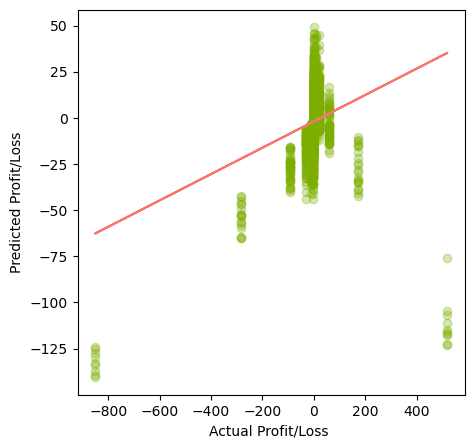

In [89]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.3, color='#7CAE00')
z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predicted Profit/Loss')
plt.xlabel('Actual Profit/Loss ')

Text(0.5, 0, 'Actual Profit/Loss ')

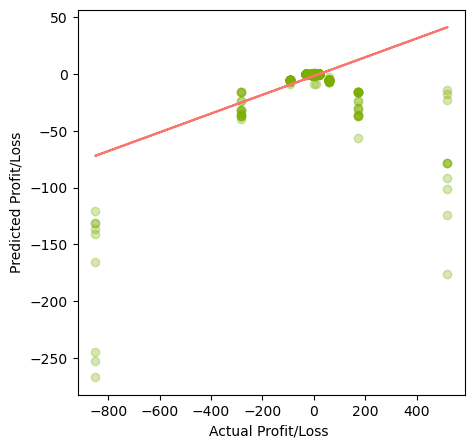

In [90]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_rf_train_pred, alpha=0.3, color='#7CAE00')
z = np.polyfit(y_train, y_rf_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predicted Profit/Loss')
plt.xlabel('Actual Profit/Loss ')

There is a dense concentration of points around the zero mark on the X-axis. This suggests that most predictions are centered around neutral or low-value predictions.

Cluster around (0, 0): A significant number of points are concentrated in this region. This indicates that many predictions are close to neutral, resulting in small profits or losses.

Clusters at higher X-values: There are some points with higher positive X-values (towards 200 and beyond), which likely indicate strong predictions. However, these points are still scattered along the Y-axis, suggesting mixed actual results.

Clusters at lower X-values: There are points with very negative X-values (as low as -800), indicating strong negative predictions. These points are also spread along the Y-axis, showing varying degrees of actual losses.

Outliers: There are a few outliers, especially around extreme negative X-values (-800) and extreme Y-values (e.g., around -125), which indicate rare but significant losses.